In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/telco_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Data Description**

===== Dataset Preview =====
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Streamin

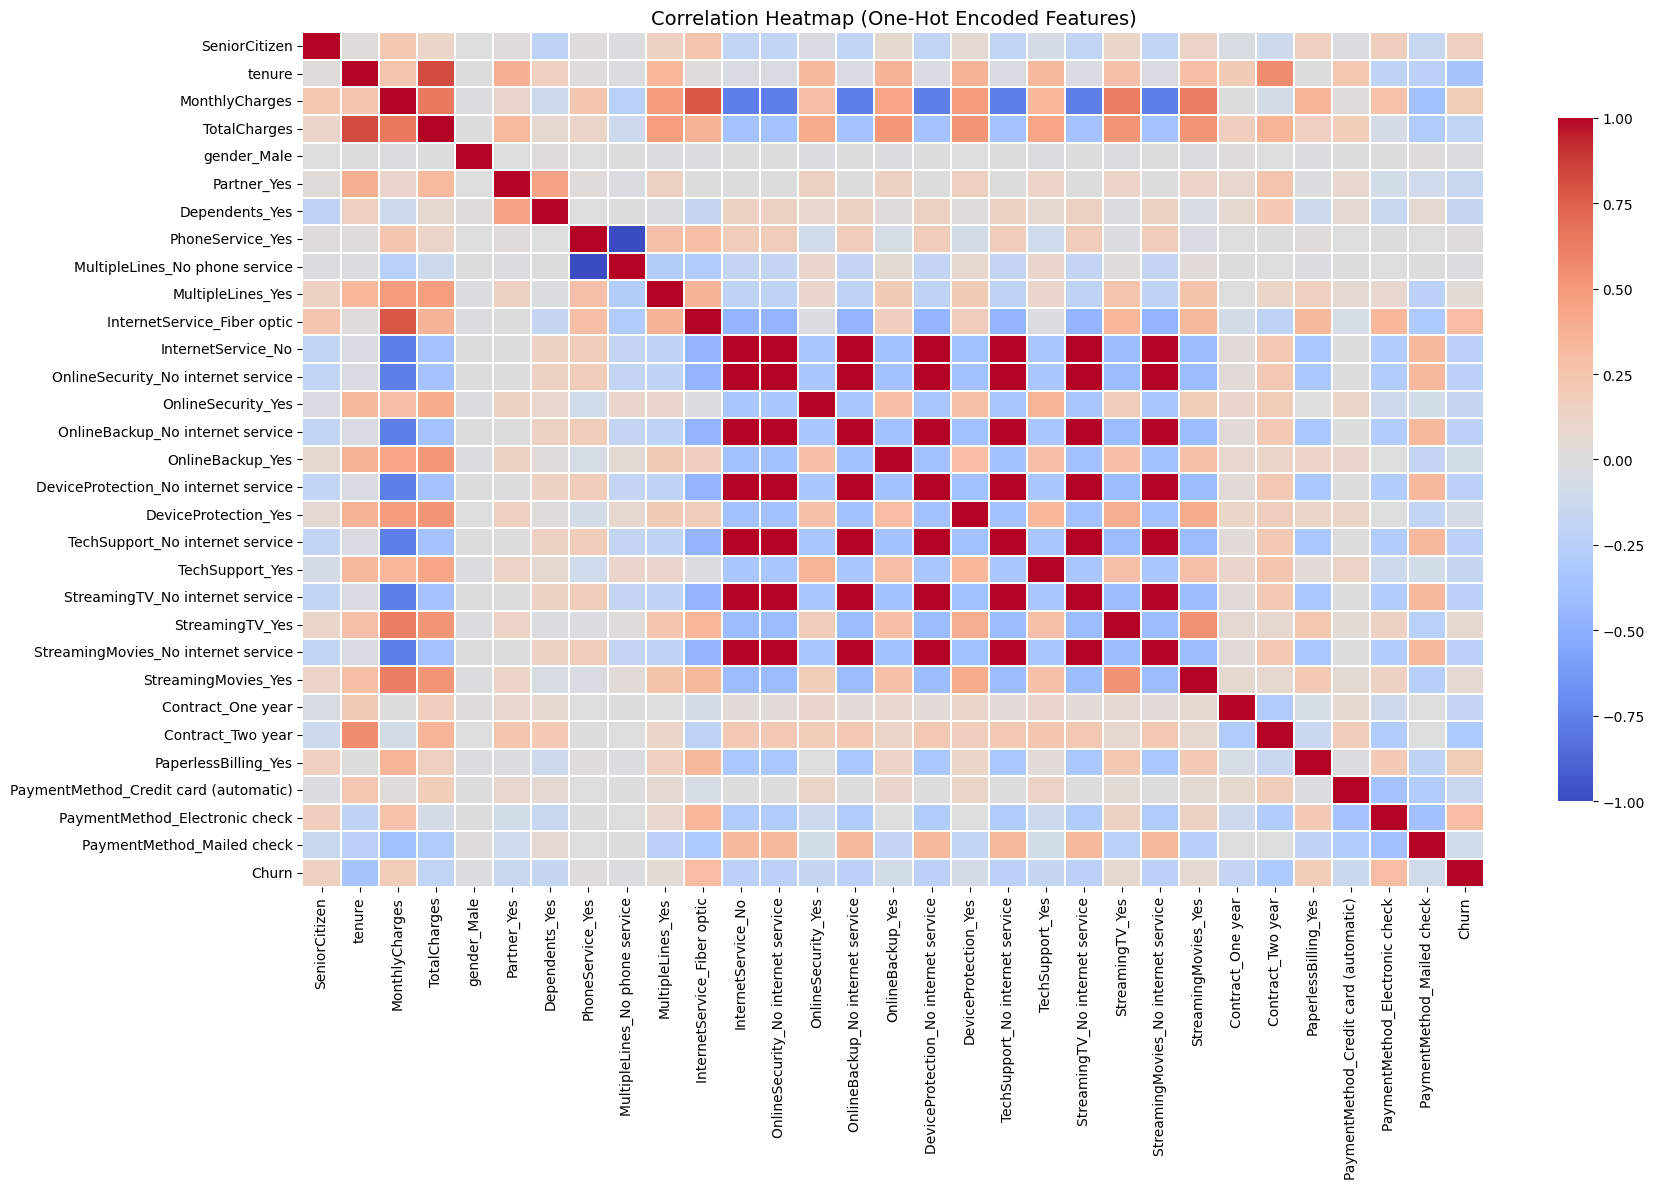

===== Correlation with Target (Churn) =====
Churn                                    1.000000
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
MonthlyCharges                           0.193356
PaperlessBilling_Yes                     0.191825
SeniorCitizen                            0.150889
StreamingTV_Yes                          0.063228
StreamingMovies_Yes                      0.061382
MultipleLines_Yes                        0.040102
PhoneService_Yes                         0.011942
gender_Male                             -0.008612
MultipleLines_No phone service          -0.011942
DeviceProtection_Yes                    -0.066160
OnlineBackup_Yes                        -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner_Yes                             -0.150448
Dependents_Yes                          -0.164221
TechSupport_Yes                         -0.164674
Online

In [ ]:
# ============================================


# Make a safe working copy
df = df.copy()

target_col = "Churn"

# -----------------------------
# 1) Quick preview + shape
# -----------------------------
print("===== Dataset Preview =====")
print(df.head(), "\n")

print("===== Dataset Shape =====")
print(f"Rows (customers): {df.shape[0]}")
print(f"Columns (features incl. target): {df.shape[1]}\n")

# -----------------------------
#
# -----------------------------
# Often has blank strings -> becomes object; convert to numeric
if "TotalCharges" in df.columns:
    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# -----------------------------
#
# -----------------------------
print("===== How many features? =====")
print(f"Total columns (features) in dataset = {df.shape[1]}")

input_features = [c for c in df.columns if c != target_col]
print(f"Target (output) feature = {target_col}")
print(f"Number of input (independent) features = {len(input_features)}\n")

# -----------------------------

# -----------------------------
print("===== Problem Type =====")
unique_target = df[target_col].dropna().unique()
print(f"Unique values in target '{target_col}': {unique_target}")

if df[target_col].nunique(dropna=True) == 2:
    print("Problem Type: Binary Classification")
    print("Why: The target has 2 classes (Churn vs Not Churn).\n")
else:
    print("Problem Type: Possibly Regression / Multi-class")
    print("Why: The target has more than 2 unique values.\n")

# -----------------------------
# 5) Data points
# -----------------------------
print("===== How many data points? =====")
print(f"Data points (rows) = {df.shape[0]} customers")
print(f"Total cells (rows × columns) = {df.shape[0] * df.shape[1]}\n")

# -----------------------------
# 6) Feature types (Categorical / Numerical)
# -----------------------------
print("===== Feature Types =====")

# Categorical = object or category
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print(f"Categorical features ({len(categorical_cols)}): {categorical_cols}")
print(f"Quantitative/Numerical features ({len(numerical_cols)}): {numerical_cols}\n")

# -----------------------------
#
# -----------------------------
print("===== Encoding Requirement =====")
if any(col != target_col for col in categorical_cols):
    print("Yes, encoding is required.")
    print("Why: ML models & correlation require numeric values; categorical text must be converted.\n")
else:
    print("No encoding needed (no categorical input columns found).\n")

# -----------------------------
#
# -----------------------------
print("===== Correlation Heatmap =====")

# Drop identifier column if exists
if "customerID" in df.columns:
    df = df.drop(columns=["customerID"])

#
if target_col not in df.columns:
    raise ValueError(f"Target column '{target_col}' not found in dataset.")

# Encode target safely (works for both 'Yes/No' and 0/1)
# If it's strings:
if df[target_col].dtype == "object" or str(df[target_col].dtype) == "category":
    df[target_col] = df[target_col].str.strip().map({"No": 0, "Yes": 1})

# If it's already numeric but not 0/1, keep as is; otherwise it’s fine.
#
if df[target_col].dropna().nunique() != 2:
    print("WARNING: Target does not look binary after encoding. Check target values.\n")

# Split X and y
X = df.drop(columns=[target_col])
y = df[target_col]

# One-hot encode ONLY categorical columns in X
X_encoded = pd.get_dummies(X, drop_first=True)

# Combine for correlation
df_final = pd.concat([X_encoded, y], axis=1)

# Correlation matrix (numeric-only by definition now)
corr = df_final.corr(numeric_only=True)

# -----------------------------
# 9) Plot heatmap
# -----------------------------
plt.figure(figsize=(18, 12))
sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    vmin=-1, vmax=1,
    linewidths=0.2,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap (One-Hot Encoded Features)", fontsize=14)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# -----------------------------
# 10) Correlation with Target (Churn)
# -----------------------------
print("===== Correlation with Target (Churn) =====")

if target_col in corr.columns:
    churn_corr = corr[target_col].sort_values(ascending=False)
    print(churn_corr)

    print("\nTop positive correlations (most related to churn):")
    print(churn_corr.head(6))

    print("\nTop negative correlations (least related to churn):")
    print(churn_corr.tail(6))
else:
    print("Target column not found in correlation matrix. Check encoding or column name.")


# **Data Preprocessing**

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

PIPELINE

In [ ]:
#
if "customerID" in df.columns:
    df = df.drop(columns=["customerID"])
    print("\nDropped customerID (Cause: identifier, not predictive).")

# ---------------------------
# FAULT 1: Null / Missing values
# ---------------------------
print("\n=== Missing Values (BEFORE) ===")
print(df.isna().sum().sort_values(ascending=False).head(10))

# Common Telco issue: TotalCharges is object because of blanks/spaces -> becomes NaN after conversion
if "TotalCharges" in df.columns:
    # cause: values stored as strings with blanks, must convert to numeric
    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
    print("\nConverted TotalCharges to numeric (Cause: stored as text/blanks).")

print("\n=== Missing Values (AFTER converting TotalCharges) ===")
missing_counts = df.isna().sum()
print(missing_counts[missing_counts > 0])

# Decide missing-value strategy:
# - Drop rows only if missing rate is very high or missing in target
# - Otherwise impute
missing_rate = (df.isna().mean() * 100).sort_values(ascending=False)
print("\n=== Missing Rate % (Top) ===")
print(missing_rate.head(10))

# ---------------------------
# Target Handling
# ---------------------------
# Support both common forms: 'Yes/No' or already 0/1
target_col = "Churn"
if target_col not in df.columns:
    raise ValueError("Target column 'Churn' not found. Check dataset columns.")

# Convert target to 0/1 if needed
if df[target_col].dtype == "object":
    df[target_col] = df[target_col].map({"No": 0, "Yes": 1})
    print("\nEncoded target Churn -> 0/1 (Cause: model needs numeric labels).")

#
before_rows = df.shape[0]
df = df.dropna(subset=[target_col])
after_rows = df.shape[0]
if after_rows != before_rows:
    print(f"\nDropped {before_rows-after_rows} rows (Cause: missing target label).")

# ---------------------------
# Separate features and target
# ---------------------------
X = df.drop(columns=[target_col])
y = df[target_col]

# ---------------------------
# FAULT 2: Categorical values
# ---------------------------
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
num_cols = X.select_dtypes(exclude=["object"]).columns.tolist()

print("\n=== Column Types ===")
print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)

# ---------------------------
# FAULT 3: Feature Scaling
# ---------------------------
# Use pipeline:
#

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),   # cause: handles NaN in numeric safely
    ("scaler", StandardScaler())                     # cause: bring numeric columns to comparable scale
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),  # cause: fill missing categories
    ("onehot", OneHotEncoder(handle_unknown="ignore"))     # cause: convert categories to numeric vectors
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ],
    remainder="drop"
)

# ---------------------------
# Train-test split (stratify keeps churn ratio)
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTrain shape:", X_train.shape, " Test shape:", X_test.shape)
print("Target distribution (train):\n", y_train.value_counts())

# ---------------------------

# ---------------------------
X_train_ready = preprocessor.fit_transform(X_train)
X_test_ready = preprocessor.transform(X_test)

print("\n Preprocessing Complete!")
print("X_train_ready shape:", X_train_ready.shape)
print("X_test_ready shape:", X_test_ready.shape)


try:
    feature_names_num = num_cols
    feature_names_cat = preprocessor.named_transformers_["cat"].named_steps["onehot"].get_feature_names_out(cat_cols)
    feature_names = np.concatenate([feature_names_num, feature_names_cat])
    print("\nTotal engineered features:", len(feature_names))
except Exception as e:
    print("\nFeature name extraction skipped:", e)


=== Missing Values (BEFORE) ===
TotalCharges      11
gender             0
Partner            0
SeniorCitizen      0
Dependents         0
tenure             0
MultipleLines      0
PhoneService       0
OnlineSecurity     0
OnlineBackup       0
dtype: int64

Converted TotalCharges to numeric (Cause: stored as text/blanks).

=== Missing Values (AFTER converting TotalCharges) ===
TotalCharges    11
dtype: int64

=== Missing Rate % (Top) ===
TotalCharges      0.156183
gender            0.000000
Partner           0.000000
SeniorCitizen     0.000000
Dependents        0.000000
tenure            0.000000
MultipleLines     0.000000
PhoneService      0.000000
OnlineSecurity    0.000000
OnlineBackup      0.000000
dtype: float64

=== Column Types ===
Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'Payment

EDA

Number of rows: 7043
Number of columns: 20

Feature Names:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Data Types:
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

Target class distribution:
Churn
0    5174


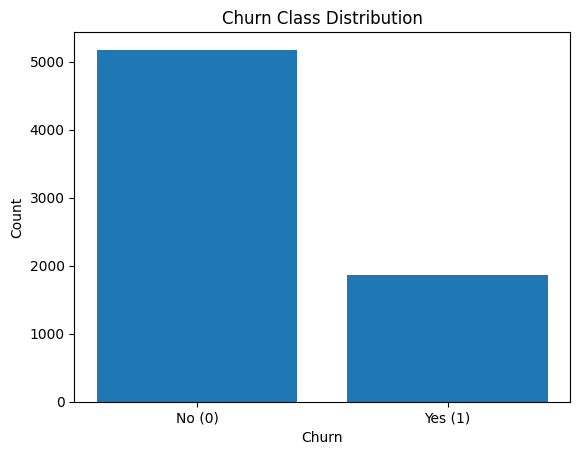


Statistical Summary (Numerical Features):
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges        Churn
count    7043.000000  7043.000000     7043.000000   7032.000000  7043.000000
mean        0.162147    32.371149       64.761692   2283.300441     0.265370
std         0.368612    24.559481       30.090047   2266.771362     0.441561
min         0.000000     0.000000       18.250000     18.800000     0.000000
25%         0.000000     9.000000       35.500000    401.450000     0.000000
50%         0.000000    29.000000       70.350000   1397.475000     0.000000
75%         0.000000    55.000000       89.850000   3794.737500     1.000000
max         1.000000    72.000000      118.750000   8684.800000     1.000000

Missing Values per Feature:
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
Devic

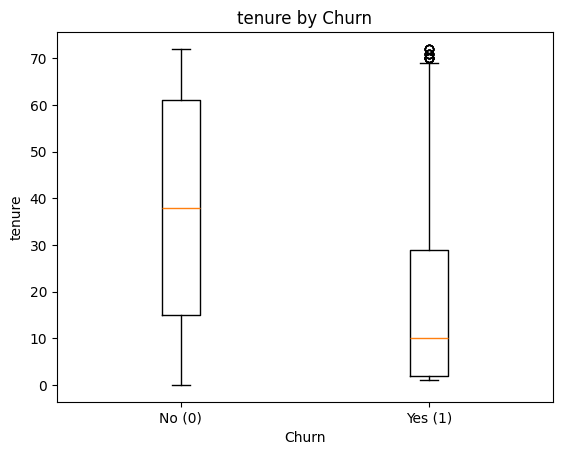

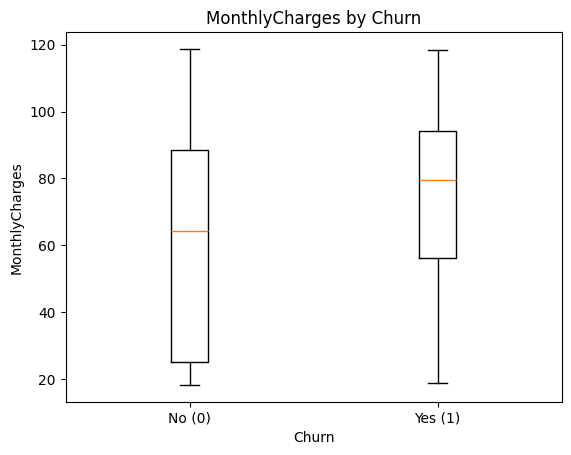

In [ ]:
num_rows, num_cols = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

print("\nFeature Names:")
print(df.columns.tolist())

print("\nData Types:")
print(df.dtypes)

# =========================
# Target Distribution (Class Imbalance)
# =========================

target_col = "Churn"

counts = df[target_col].value_counts().sort_index()
print("\nTarget class distribution:")
print(counts)

plt.figure()
plt.bar(["No (0)", "Yes (1)"], counts.values)
plt.title("Churn Class Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

# =========================
# Numerical Feature Summary
# =========================

print("\nStatistical Summary (Numerical Features):")
print(df.describe())

# =========================
# Missing Value Check
# =========================

print("\nMissing Values per Feature:")
print(df.isnull().sum())

# =========================
# Quick EDA: tenure & MonthlyCharges vs Churn
# =========================

for col in ["tenure", "MonthlyCharges"]:
    if col in df.columns:
        data_no = df.loc[df[target_col] == 0, col].dropna().values
        data_yes = df.loc[df[target_col] == 1, col].dropna().values

        plt.figure()
        plt.boxplot(
            [data_no, data_yes],
            tick_labels=["No (0)", "Yes (1)"]
        )
        plt.title(f"{col} by Churn")
        plt.xlabel("Churn")
        plt.ylabel(col)
        plt.show()

# **Model Training and Testing**

In [ ]:
import numpy as np
import pandas as pd

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)


Supervised Learning

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=2000, random_state=42)
log_reg.fit(X_train_ready, y_train)

y_pred_lr = log_reg.predict(X_test_ready)
y_prob_lr = log_reg.predict_proba(X_test_ready)[:, 1]

print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


=== Logistic Regression ===
Accuracy: 0.8055358410220014
ROC-AUC: 0.8418610659019866
Confusion Matrix:
 [[926 109]
 [165 209]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42, max_depth=6)
dt.fit(X_train_ready, y_train)

y_pred_dt = dt.predict(X_test_ready)
y_prob_dt = dt.predict_proba(X_test_ready)[:, 1]

print("=== Decision Tree ===")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


=== Decision Tree ===
Accuracy: 0.7913413768630234
ROC-AUC: 0.835092614120747
Confusion Matrix:
 [[926 109]
 [185 189]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.51      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



**Nueral Network (MLP)**

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    learning_rate_init=0.001,
    max_iter=1000,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=20,
    random_state=42
)

mlp.fit(X_train_ready, y_train)

y_pred_mlp = mlp.predict(X_test_ready)
y_prob_mlp = mlp.predict_proba(X_test_ready)[:, 1]

print("=== Neural Network (MLP, Tuned) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_mlp))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))
print("Classification Report:\n", classification_report(y_test, y_pred_mlp))
print("Iterations used:", mlp.n_iter_)


=== Neural Network (MLP, Tuned) ===
Accuracy: 0.7892122072391767
ROC-AUC: 0.8386292593453719
Confusion Matrix:
 [[931 104]
 [193 181]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.48      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

Iterations used: 49


**Oversampling for better churn detection (ONLY train data)**

In [ ]:
from sklearn.utils import resample
from sklearn.neural_network import MLPClassifier

# Convert sparse to dense (safer for oversampling with numpy)
Xtr = X_train_ready.toarray() if hasattr(X_train_ready, "toarray") else X_train_ready
ytr = y_train.to_numpy()

# Split by class
X0, y0 = Xtr[ytr == 0], ytr[ytr == 0]
X1, y1 = Xtr[ytr == 1], ytr[ytr == 1]

# Oversample minority class (Churn=1) to match majority size
X1_up, y1_up = resample(
    X1, y1,
    replace=True,
    n_samples=len(y0),
    random_state=42
)

#
X_bal = np.vstack([X0, X1_up])
y_bal = np.concatenate([y0, y1_up])

# Train a new MLP on balanced data
mlp_bal = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    learning_rate_init=0.001,
    max_iter=1000,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=20,
    random_state=42
)

mlp_bal.fit(X_bal, y_bal)

# Evaluate on the SAME test set (do not oversample test)
Xte = X_test_ready.toarray() if hasattr(X_test_ready, "toarray") else X_test_ready
y_pred_bal = mlp_bal.predict(Xte)
y_prob_bal = mlp_bal.predict_proba(Xte)[:, 1]

print("=== Neural Network (MLP, Oversampled Train Only) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_bal))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_bal))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bal))
print("Classification Report:\n", classification_report(y_test, y_pred_bal))
acc_pct = accuracy_score(y_test, y_pred_bal) * 100
prec_pct = precision_score(y_test, y_pred_bal, zero_division=0) * 100
rec_pct = recall_score(y_test, y_pred_bal, zero_division=0) * 100
f1_pct = f1_score(y_test, y_pred_bal, zero_division=0) * 100
auc_pct = roc_auc_score(y_test, y_prob_bal) * 100

print("\n=== Performance Metrics (Percentage) ===")
print(f"Accuracy      : {acc_pct:.2f}%")
print(f"Precision     : {prec_pct:.2f}%")
print(f"Recall        : {rec_pct:.2f}%")
print(f"F1-score      : {f1_pct:.2f}%")
print(f"ROC-AUC       : {auc_pct:.2f}%")

=== Neural Network (MLP, Oversampled Train Only) ===
Accuracy: 0.7494677075940384
ROC-AUC: 0.7970110310263763
Confusion Matrix:
 [[806 229]
 [124 250]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.78      0.82      1035
           1       0.52      0.67      0.59       374

    accuracy                           0.75      1409
   macro avg       0.69      0.72      0.70      1409
weighted avg       0.78      0.75      0.76      1409


=== Performance Metrics (Percentage) ===
Accuracy      : 74.95%
Precision     : 52.19%
Recall        : 66.84%
F1-score      : 58.62%
ROC-AUC       : 79.70%


**Evaluation Model (Accuracy, F1, ROC-AUC, Confusion Matrix)**



In [ ]:
import numpy as np
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix
)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_ready, y_train)


def evaluate_model(model, X_test, y_test):

    y_pred = model.predict(X_test)

    # ROC-AUC needs a continuous score (probability or decision score)
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_score)
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)
        auc = roc_auc_score(y_test, y_score)
    else:
        auc = np.nan

    # Metrics (zero_division avoids undefined precision if model predicts no churn)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    return {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1,
        "ROC_AUC": auc,
        "ConfusionMatrix": cm
    }


In [ ]:
import pandas as pd
import numpy as np

def table_results(results):
    # Extract metrics as percentages
    metrics = {
        'Accuracy': f"{results['Accuracy']*100:.1f}%",
        'Precision': f"{results['Precision']*100:.1f}%",
        'Recall': f"{results['Recall']*100:.1f}%",
        'F1': f"{results['F1']*100:.1f}%",
        'ROC_AUC': f"{float(results['ROC_AUC'])*100:.1f}%"
    }

    # Main metrics table
    df_metrics = pd.DataFrame([metrics])
    print(" MODEL PERFORMANCE (%)")
    print("="*35)
    print(df_metrics.to_string(index=False))

    # Confusion Matrix with percentages
    print("\nCONFUSION MATRIX")
    print("-"*40)
    cm = results['ConfusionMatrix']
    total = cm.sum()

    cm_df = pd.DataFrame({
        'Pred No': [f"{cm[0,0]}\n({cm[0,0]/total*100:.1f}%)", f"{cm[1,0]}\n({cm[1,0]/total*100:.1f}%)"],
        'Pred Yes': [f"{cm[0,1]}\n({cm[0,1]/total*100:.1f}%)", f"{cm[1,1]}\n({cm[1,1]/total*100:.1f}%)"]
    }, index=['Actual No', 'Actual Yes'])

    print(cm_df.to_string())

    # Quick summary
    print("\nSUMMARY")
    print("-"*20)
    print(f"Churn correctly predicted: {cm[1,1]} ({cm[1,1]/cm[1,:].sum()*100:.1f}% of actual churn)")
    print(f"Total test samples: {total}")

# Use it
results = evaluate_model(model, X_test_ready, y_test)
table_results(results)



 MODEL PERFORMANCE (%)
Accuracy Precision Recall    F1 ROC_AUC
   80.6%     65.7%  55.9% 60.4%   84.2%

CONFUSION MATRIX
----------------------------------------
                 Pred No      Pred Yes
Actual No   926\n(65.7%)   109\n(7.7%)
Actual Yes  165\n(11.7%)  209\n(14.8%)

SUMMARY
--------------------
Churn correctly predicted: 209 (55.9% of actual churn)
Total test samples: 1409


In [ ]:
import pandas as pd

def metric_table(name, y_true, y_pred, y_prob=None):
    data = {
        "Model": name,
        "Accuracy (%)": accuracy_score(y_true, y_pred) * 100,
        "Precision (%)": precision_score(y_true, y_pred, zero_division=0) * 100,
        "Recall (%)": recall_score(y_true, y_pred, zero_division=0) * 100,
        "F1-score (%)": f1_score(y_true, y_pred, zero_division=0) * 100,
        "ROC-AUC (%)": roc_auc_score(y_true, y_prob) * 100 if y_prob is not None else None
    }
    return pd.DataFrame([data])

In [ ]:
results_df = pd.concat([
    metric_table("Logistic Regression", y_test, y_pred_lr, y_prob_lr),
    metric_table("Decision Tree", y_test, y_pred_dt, y_prob_dt),
    metric_table("MLP", y_test, y_pred_mlp, y_prob_mlp),
    metric_table("MLP (Oversampled)", y_test, y_pred_bal, y_prob_bal)
])

print(results_df.round(2))


                 Model  Accuracy (%)  Precision (%)  Recall (%)  F1-score (%)  \
0  Logistic Regression         80.55          65.72       55.88         60.40   
0        Decision Tree         79.13          63.42       50.53         56.25   
0                  MLP         78.92          63.51       48.40         54.93   
0    MLP (Oversampled)         74.95          52.19       66.84         58.62   

   ROC-AUC (%)  
0        84.19  
0        83.51  
0        83.86  
0        79.70  


Unsupervised Learning

In [ ]:
X_train_ready = preprocessor.fit_transform(X_train)
X_test_ready = preprocessor.transform(X_test)


K- Means Clusterring

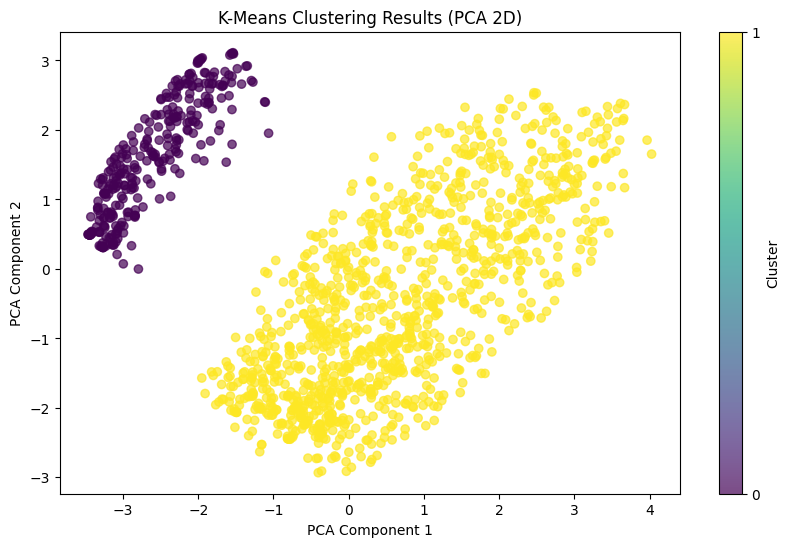

Churn Percentage per Cluster:
Cluster
0     7.25
1    31.83
Name: Churn, dtype: float64


In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Ensure dense arrays
Xtr = X_train_ready.toarray() if hasattr(X_train_ready, "toarray") else X_train_ready
Xte = X_test_ready.toarray() if hasattr(X_test_ready, "toarray") else X_test_ready

# Train KMeans on TRAIN data only
best_k = 2
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans.fit(Xtr)

#  TRAIN and TEST cluster labels
train_clusters = kmeans.labels_
test_clusters = kmeans.predict(Xte)

# PCA: fit on TRAIN, transform TEST
pca = PCA(n_components=2, random_state=42)
pca.fit(Xtr)
Xte_2d = pca.transform(Xte)

# Plot TEST clusters
plt.figure(figsize=(10, 6))
sc = plt.scatter(Xte_2d[:, 0], Xte_2d[:, 1],
                 c=test_clusters, alpha=0.7)
plt.title("K-Means Clustering Results (PCA 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

cbar = plt.colorbar(sc)
cbar.set_label("Cluster")
cbar.set_ticks(np.unique(test_clusters))
plt.show()

# Cluster vs churn (TRAIN only – correct practice)
cluster_churn = pd.DataFrame({
    "Cluster": train_clusters,
    "Churn": y_train.values
}).groupby("Cluster")["Churn"].mean()

print("Churn Percentage per Cluster:")
print((cluster_churn * 100).round(2))


Comparison Table (LR vs DT vs MLP)

In [ ]:
def row(model_name, y_true, y_pred, y_prob):
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision (Churn=1)": precision_score(y_true, y_pred),
        "Recall (Churn=1)": recall_score(y_true, y_pred),
        "F1 (Churn=1)": f1_score(y_true, y_pred),
        "ROC-AUC": roc_auc_score(y_true, y_prob)
    }

results_df = pd.DataFrame([
    row("Logistic Regression", y_test, y_pred_lr, y_prob_lr),
    row("Decision Tree", y_test, y_pred_dt, y_prob_dt),
    row("Neural Network (MLP Tuned)", y_test, y_pred_mlp, y_prob_mlp),
])

results_df


,Model,Accuracy,Precision (Churn=1),Recall (Churn=1),F1 (Churn=1),ROC-AUC
0,Logistic Regression,0.805536,0.657233,0.558824,0.604046,0.841861
1,Decision Tree,0.791341,0.634228,0.505348,0.562500,0.835093
2,Neural Network (MLP Tuned),0.789212,0.635088,0.483957,0.549317,0.838629


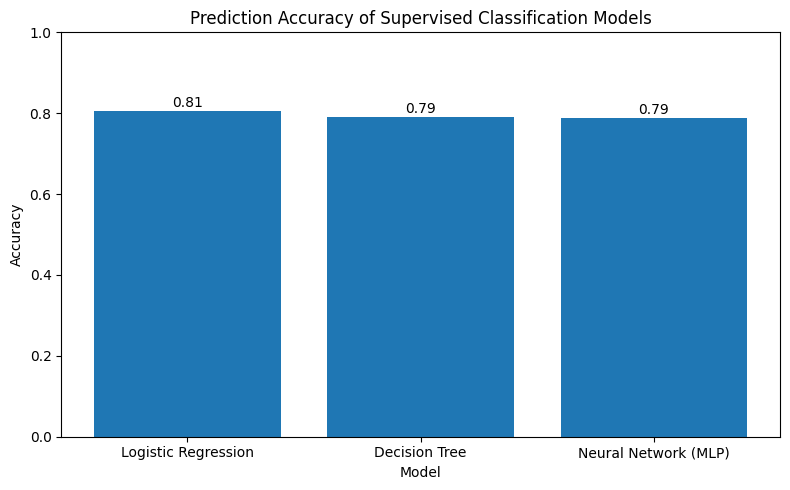

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score

# Accuracy of supervised classification models
model_accuracies = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Neural Network (MLP)": accuracy_score(y_test, y_pred_mlp)
}

accuracy_df = pd.DataFrame(
    model_accuracies.items(),
    columns=["Model", "Accuracy"]
)

plt.figure(figsize=(8, 5))
plt.bar(accuracy_df["Model"], accuracy_df["Accuracy"])
plt.title("Prediction Accuracy of Supervised Classification Models")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)

for i, acc in enumerate(accuracy_df["Accuracy"]):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha="center")

plt.tight_layout()
plt.show()


Cluster
0     8.012821
1    31.814038
Name: Churn, dtype: float64


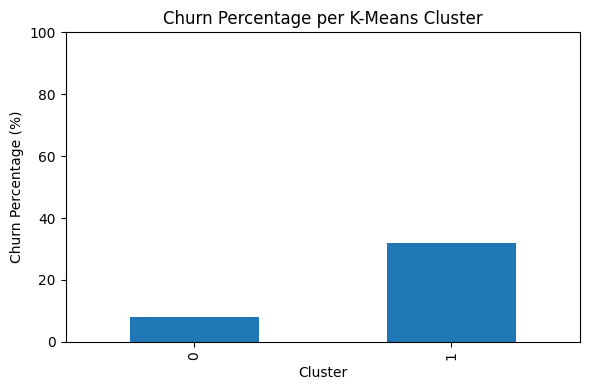

<bound method PCA.fit of PCA(n_components=2, random_state=42)>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Xtr = X_train_ready.toarray() if hasattr(X_train_ready, "toarray") else X_train_ready
Xte = X_test_ready.toarray() if hasattr(X_test_ready, "toarray") else X_test_ready

best_k = 2
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans.fit(Xtr)

cluster_labels_test = kmeans.predict(Xte)

results_test = pd.DataFrame({
    "Cluster": cluster_labels_test,
    "Churn": np.array(y_test)
})

cluster_churn_percent = (
    results_test.groupby("Cluster")["Churn"]
    .mean()
    .mul(100)
    .sort_index()
)

print(cluster_churn_percent)

cluster_churn_percent.plot(
    kind="bar",
    figsize=(6, 4),
    title="Churn Percentage per K-Means Cluster",
    ylabel="Churn Percentage (%)",
    xlabel="Cluster",
    legend=False
)

plt.ylim(0, 100)
plt.tight_layout()
plt.show()

pca = PCA(n_components=2, random_state=42)
pca.fit


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# List of supervised classification models
classifiers = [
    log_reg,
    dt,
    mlp
]

# Loop through each classifier
for model in classifiers:
    y_pred = model.predict(X_test_ready)

    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    print(f"{type(model).__name__}:")
    print(f" Precision       : {precision:.4f} ({precision * 100:.2f}%)")
    print(f" Recall          : {recall:.4f} ({recall * 100:.2f}%)")
    print(" Confusion Matrix:")
    print(cm)
    print("-" * 40)


Confusion Matrix


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

models = [
    (dt, "Confusion Matrix for DecisionTreeClassifier"),
    (log_reg, "Confusion Matrix for LogisticRegression"),
    (mlp, "Confusion Matrix for MLPClassifier")
]

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel()

for i, (model, title) in enumerate(models):
    cm = confusion_matrix(y_test, model.predict(X_test_ready))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(ax=axes[i], cmap="Blues", values_format="d", colorbar=True)
    axes[i].set_title(title)

# Hide the unused 4th subplot
axes[3].axis("off")

plt.tight_layout()
plt.show()


ROC Curve + AUC Score for Each Model (Classification)



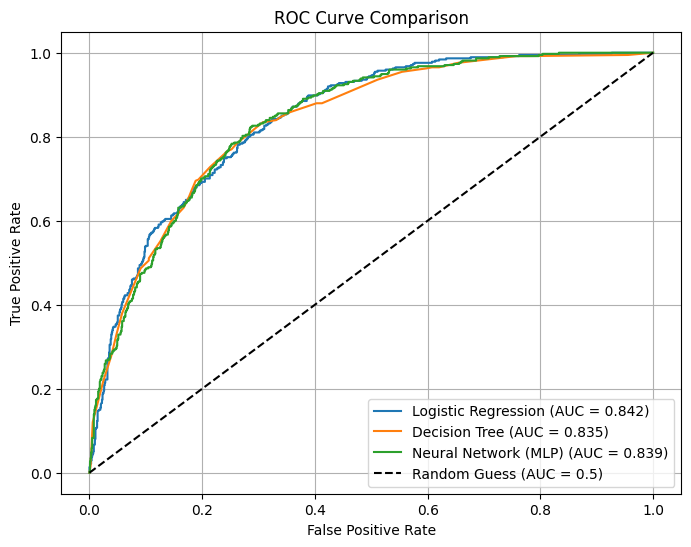

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

models = [
    (log_reg, "Logistic Regression"),
    (dt, "Decision Tree"),
    (mlp, "Neural Network (MLP)")
]

plt.figure(figsize=(8, 6))

for model, name in models:
    y_prob = model.predict_proba(X_test_ready)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], "k--", label="Random Guess (AUC = 0.5)")

plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
